# Hypotheses 1 and 3

Use [a)](https://daviddalpiaz.github.io/appliedstats/model-diagnostics.html#influence), [b)](https://daviddalpiaz.github.io/appliedstats/transformations.html), and [c)](https://ademos.people.uic.edu/Chapter18.html) as a reference.


The presence of credibility indicators in the system will:

- $H_1$: decrease the affirmation rate for rumours with lower evidence levels.
- $H_3$: increase the affirmation rate for rumours with higher evidence levels.

In [2]:
library(lme4)
library(e1071) 
library(parameters) 
options(scipen = 100)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_tiktok,socialMedias_tumblr,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,veracityEstimate
,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1002376229115702528,1,2021-06-03 14:18:19.569000+00:00,undergrad,centreLeft,False,29,1,0,0,⋯,1,0,1,Control,High,0.0,0.0,0.00,0.75,1
2,-1044319514900072064,1,2021-06-07 19:52:22.236000+00:00,graduateSchool,left,True,27,0,0,1,⋯,0,0,0,Treatment,High,0.5,0.2,0.75,1.00,6
3,-1044319514900072064,1,2021-06-07 19:52:22.236000+00:00,graduateSchool,left,True,27,0,0,1,⋯,0,0,0,Treatment,Low,0.6,0.9,1.00,1.00,9
4,-1058955249952971904,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,0,0,Treatment,High,0.2,0.2,0.25,0.50,5
5,-1058955249952971904,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,0,0,Treatment,Low,0.3,0.6,0.25,0.00,8
6,-1338418376815842304,1,2021-06-04 13:48:40.369000+00:00,communityCollege,centreRight,False,37,1,0,0,⋯,0,0,0,Treatment,Low,0.1,0.0,0.00,0.00,6


In [3]:
levels(data$condition)
levels(data$evidence)

[1] "Control"   "Treatment"

[1] "High" "Low"

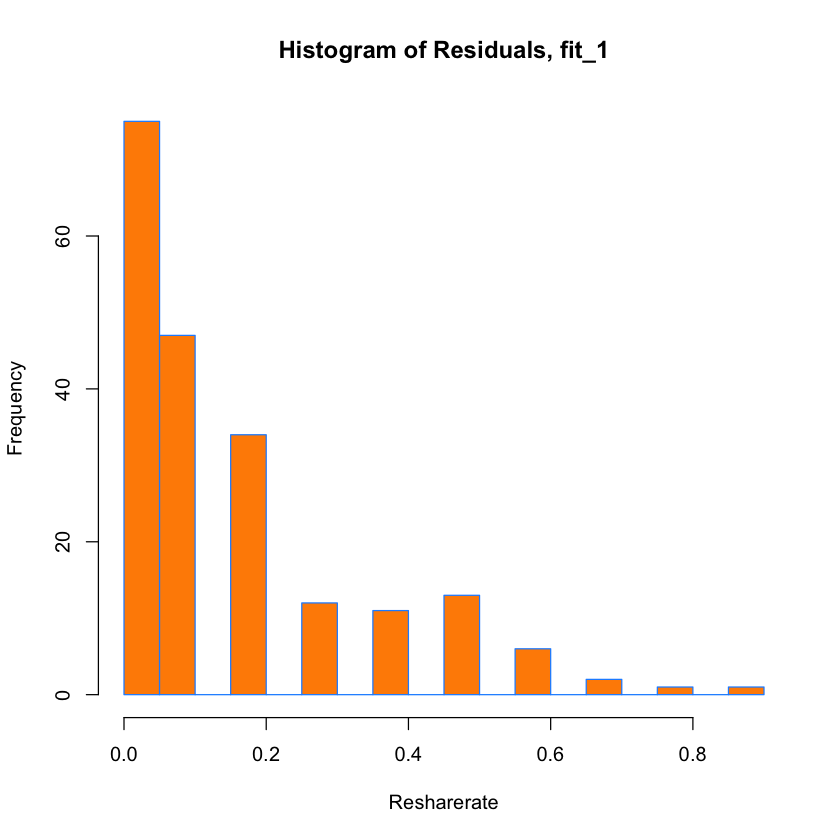

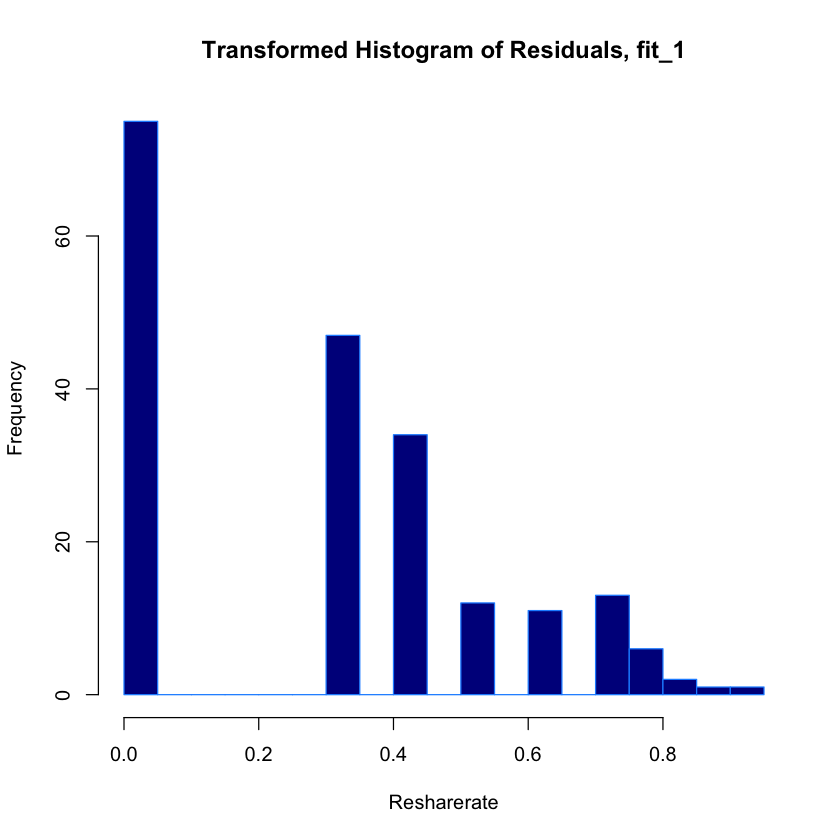

In [5]:
hist(data$Affirms,
     xlab   = "Resharerate",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)
hist(sqrt(data$Affirms),
     xlab   = "Resharerate",
     main   = "Transformed Histogram of Residuals, fit_1",
     col    = "darkblue",
     border = "dodgerblue",
     breaks = 20)

## Baseline model

Are people less likely to reshare the low evidence rumour?

In [6]:
md.affirms.baseline = lmer(Affirms ~ evidence + (1 |user_id), data = data)
p_value_satterthwaite(md.affirms.baseline)
summary(md.affirms.baseline)

Parameter,p
<chr>,<dbl>
(Intercept),0.00000000000000001058588
evidenceLow,0.07076087812271139587672


Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -111.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9131 -0.5305 -0.2353  0.3960  3.4229 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01618  0.1272  
 Residual             0.01943  0.1394  
Number of obs: 202, groups:  user_id, 109

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.18074    0.01894   9.541
evidenceLow -0.03651    0.01999  -1.826

Correlation of Fixed Effects:
            (Intr)
evidenceLow -0.557

## Interaction model

What is the marginal effect of the treatment?

In [7]:
md.affirms.interaction = lmer(Affirms ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.affirms.interaction)
summary(md.affirms.interaction)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000004643568
evidenceLow,0.4684142311782938
conditionTreatment,0.7642980140698592
evidenceLow:conditionTreatment,0.4088140633900562


Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -102.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8667 -0.5119 -0.2334  0.3659  3.3557 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01650  0.1285  
 Residual             0.01943  0.1394  
Number of obs: 202, groups:  user_id, 109

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.17531    0.02655   6.603
evidenceLow                    -0.02032    0.02792  -0.728
conditionTreatment              0.01143    0.03806   0.300
evidenceLow:conditionTreatment -0.03318    0.04000  -0.829

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.547              
cndtnTrtmnt -0.698  0.382       
evdncLw:cnT  0.382 -0.698 -0.555

Often, the assumptions of linear regression, are stated as,

- **Linearity**: the response can be written as a linear combination of the predictors. (With noise about this true linear relationship.)
- **Independence**: the errors are independent.
- **Normality**: the distribution of the errors should follow a normal distribution.
- **Equal Variance**: the error variance is the same at any set of predictor values.

The linearity assumption is encoded as

$\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_{p−1}x_{i(p−1)}$,

while the remaining three, are all encoded in

$\epsilon_i~N(0,\sigma^2)$,

since the $\epsilon_i$ are iid normal random variables with constant variance.

If these assumptions are met, great! We can perform inference, and it is valid. If these assumptions are not met, we can still “perform” a t
-test using R, but the results are not valid. The distributions of the parameter estimates will not be what we expect. Hypothesis tests will then accept or reject incorrectly. Essentially, garbage in, garbage out.


In [8]:
anova(md.affirms.baseline,md.affirms.interaction)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
md.affirms.baseline,4,-115.9534,-102.72035,61.97671,-123.9534,NA,NA,NA
md.affirms.interaction,6,-112.6886,-92.83896,62.34428,-124.6886,0.7351467,2,0.6924125


## linearity and constant variance 

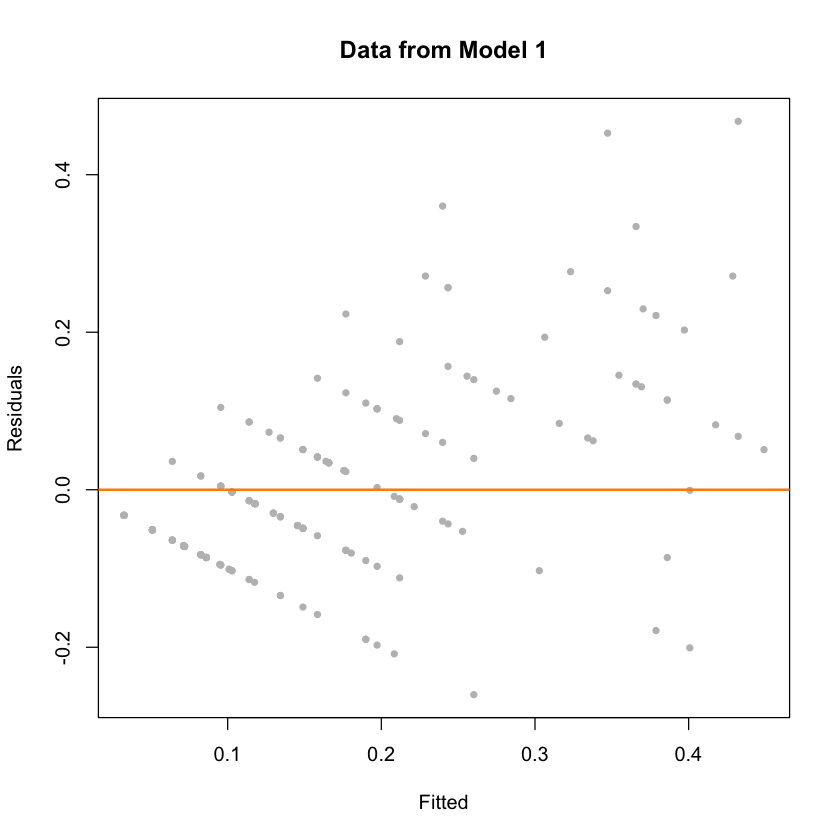

In [10]:
plot(fitted(md.affirms.interaction), resid(md.affirms.interaction), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

In [11]:
mean(resid(md.affirms.interaction))

[1] -0.0000000000000002512425

## Normality

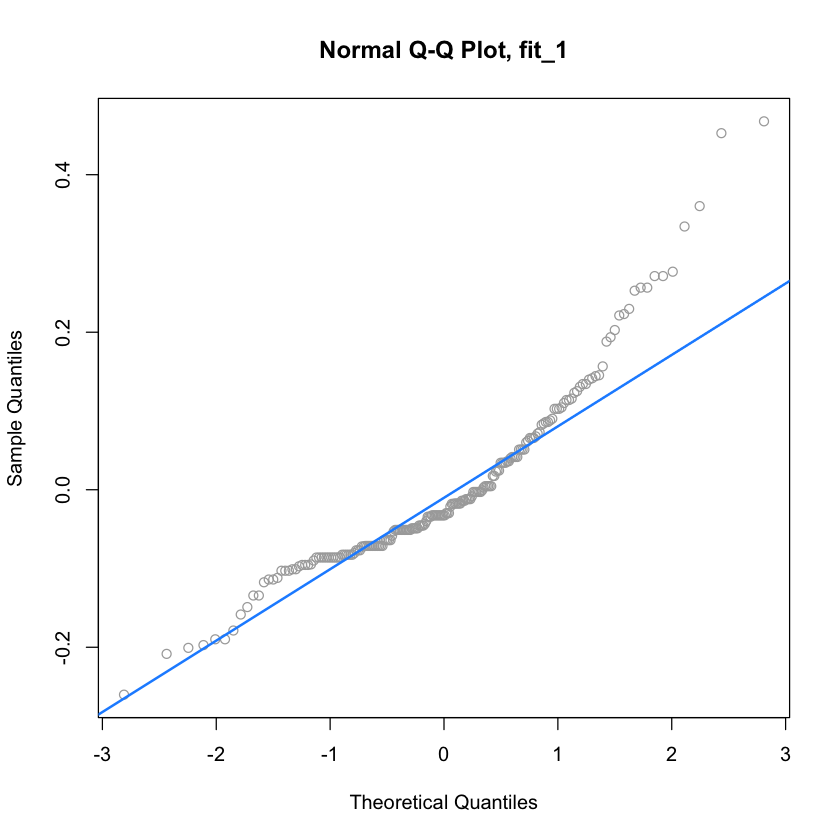

In [12]:
qqnorm(resid(md.affirms.interaction), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms.interaction), col = "dodgerblue", lwd = 2)

In [13]:
shapiro.test(resid(md.affirms.interaction))


	Shapiro-Wilk normality test

data:  resid(md.affirms.interaction)
W = 0.90565, p-value = 0.0000000005061


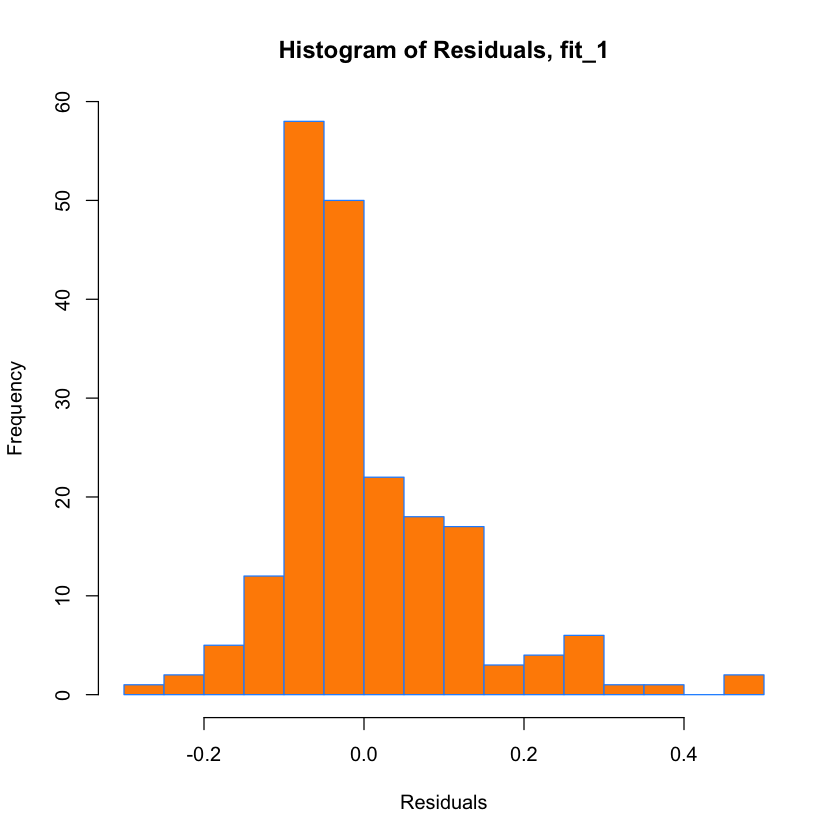

In [14]:
hist(resid(md.affirms.interaction),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

#### Normality assumption is broekn so transform response var

In [15]:
skewness(data$Affirms)$Skewness
skewness(sqrt(data$Affirms))$Skewness

[1] 1.354246

[1] 0.2396572

In [16]:
md.affirms.transformed = lmer(sqrt(Affirms) ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.affirms.transformed)
summary(md.affirms.transformed)

Parameter,p
<chr>,<dbl>
(Intercept),0.000000000000003011109
evidenceLow,0.382896577503153867639
conditionTreatment,0.685409633693805919741
evidenceLow:conditionTreatment,0.308029873979698443076


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: 30.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96250 -0.64486  0.02909  0.52234  2.25378 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03446  0.1856  
 Residual             0.03675  0.1917  
Number of obs: 202, groups:  user_id, 109

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.32386    0.03734   8.674
evidenceLow                    -0.03368    0.03843  -0.877
conditionTreatment              0.02171    0.05351   0.406
evidenceLow:conditionTreatment -0.05643    0.05507  -1.025

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.536              
cndtnTrtmnt -0.698  0.374       
evdncLw:cnT  0.374 -0.698 -0.544

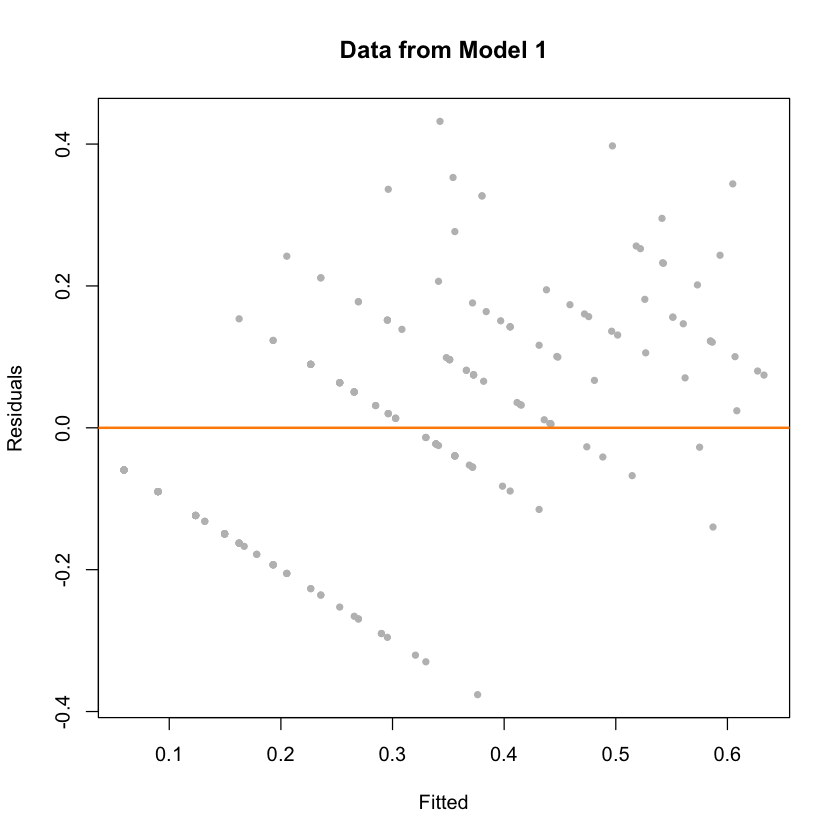

In [17]:
plot(fitted(md.affirms.transformed), resid(md.affirms.transformed), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

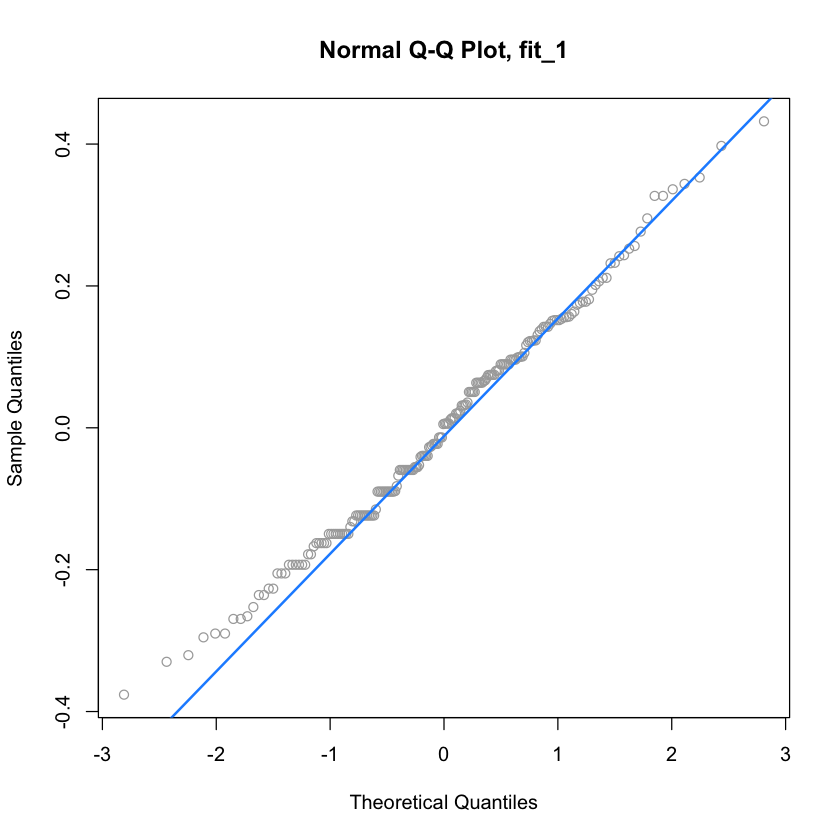

In [18]:
qqnorm(resid(md.affirms.transformed), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms.transformed), col = "dodgerblue", lwd = 2)

In [19]:
shapiro.test(resid(md.affirms.transformed))


	Shapiro-Wilk normality test

data:  resid(md.affirms.transformed)
W = 0.99224, p-value = 0.3606


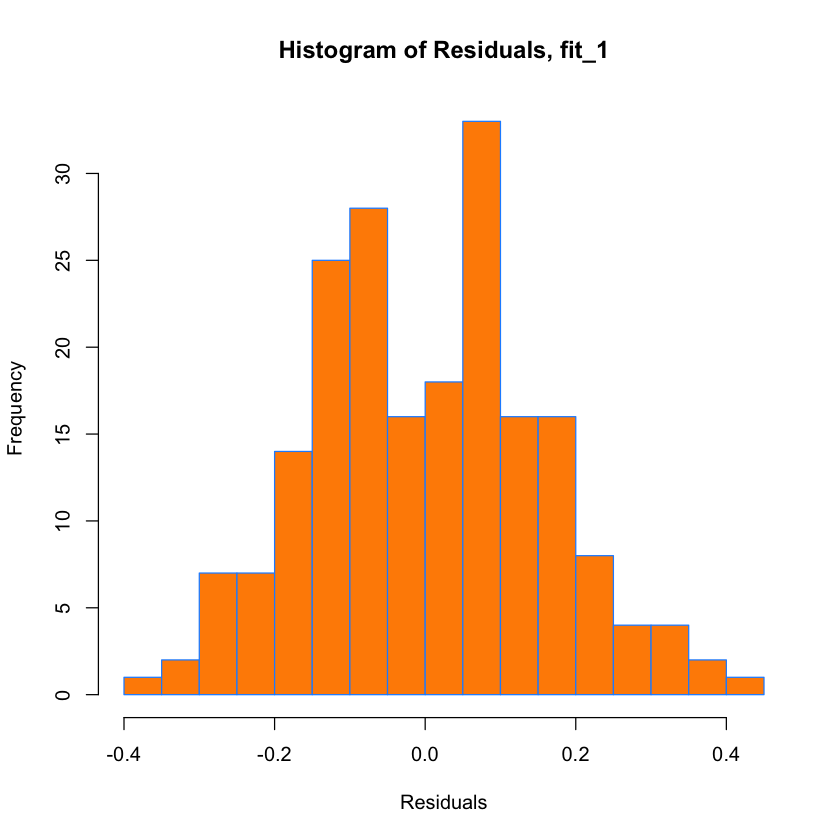

In [20]:
hist(resid(md.affirms.transformed),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

### SEE HOW ESTIMATES CHANGE WHEN REMOVE INFLUENTIAL POINTS

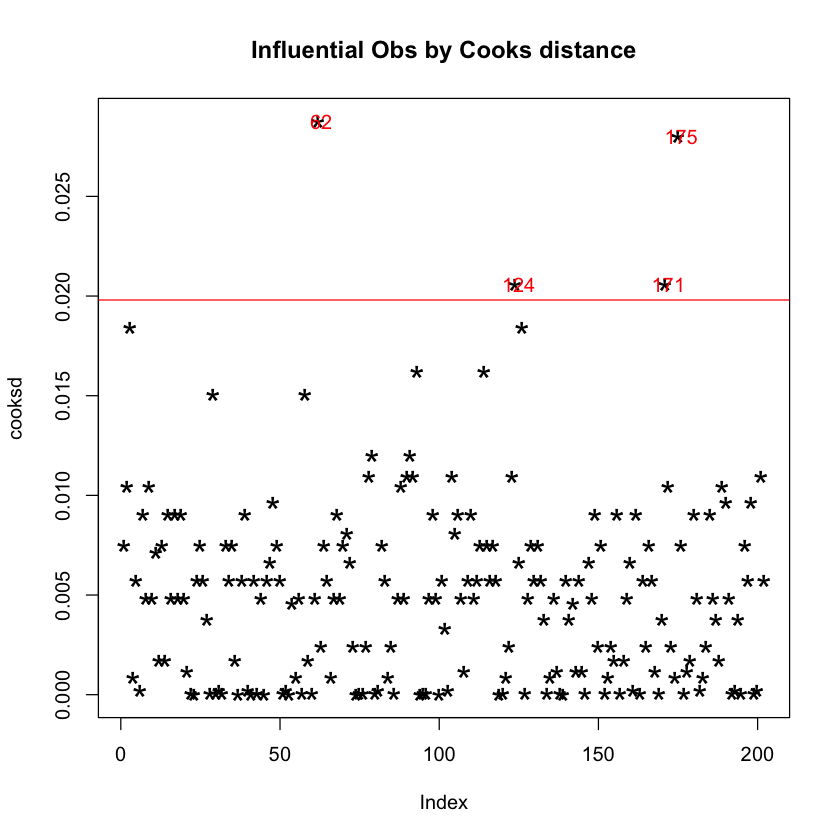

In [22]:
mod <- lm(sqrt(Affirms) ~ evidence * condition + (1 |user_id),data=data)
cooksd <- cooks.distance(mod)
thresh <- 4
# Plot the Cook's Distance using the traditional 4/n criterion
sample_size <- nrow(data)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = thresh/sample_size, col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>thresh/sample_size, names(cooksd),""), col="red")  # add label

In [23]:
md.affirms.trans.rem = lmer(sqrt(Affirms) ~ evidence * condition + (1 |user_id),
                  data=data,
                  subset = cooksd<=(thresh/sample_size)
                 )
p_value_satterthwaite(md.affirms.trans.rem)
summary(md.affirms.trans.rem)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000000000003090376
evidenceLow,0.1903995945804245470967
conditionTreatment,0.8369945668962207596664
evidenceLow:conditionTreatment,0.4611146851277264646640


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ evidence * condition + (1 | user_id)
   Data: data
 Subset: cooksd <= (thresh/sample_size)

REML criterion at convergence: 16.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.02837 -0.71877  0.06575  0.57234  2.37208 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03041  0.1744  
 Residual             0.03514  0.1874  
Number of obs: 198, groups:  user_id, 109

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.32445    0.03585   9.050
evidenceLow                    -0.05025    0.03810  -1.319
conditionTreatment              0.01064    0.05163   0.206
evidenceLow:conditionTreatment -0.04042    0.05463  -0.740

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.539              
cndtnTrtmnt -0.694  0.374       
evdncLw:cnT  0.376 -0.697 -0.552

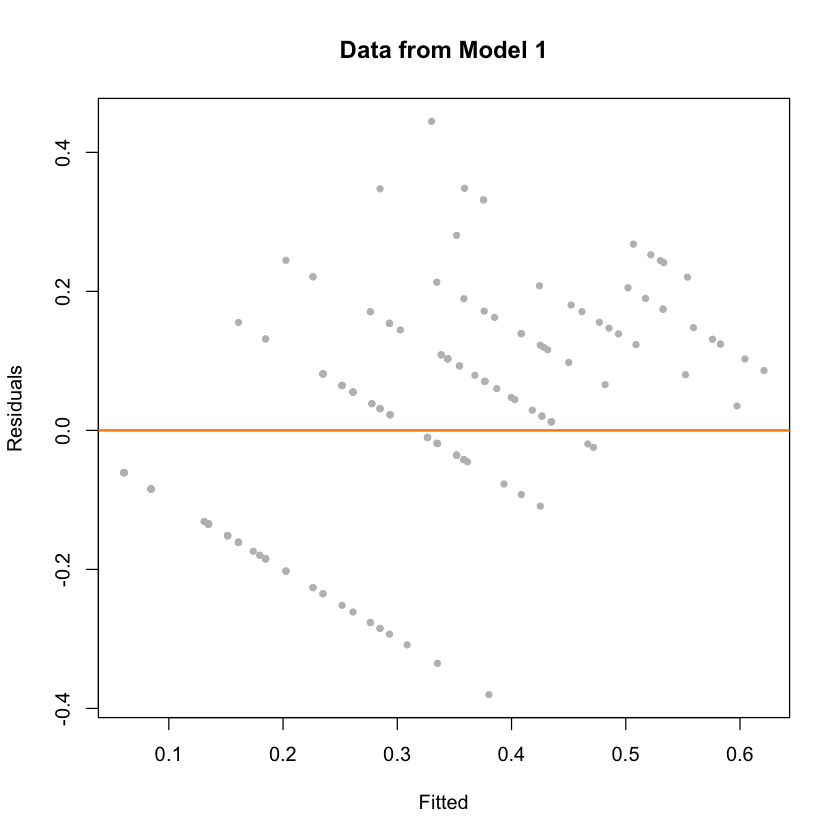

In [24]:
plot(fitted(md.affirms.trans.rem), resid(md.affirms.trans.rem), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

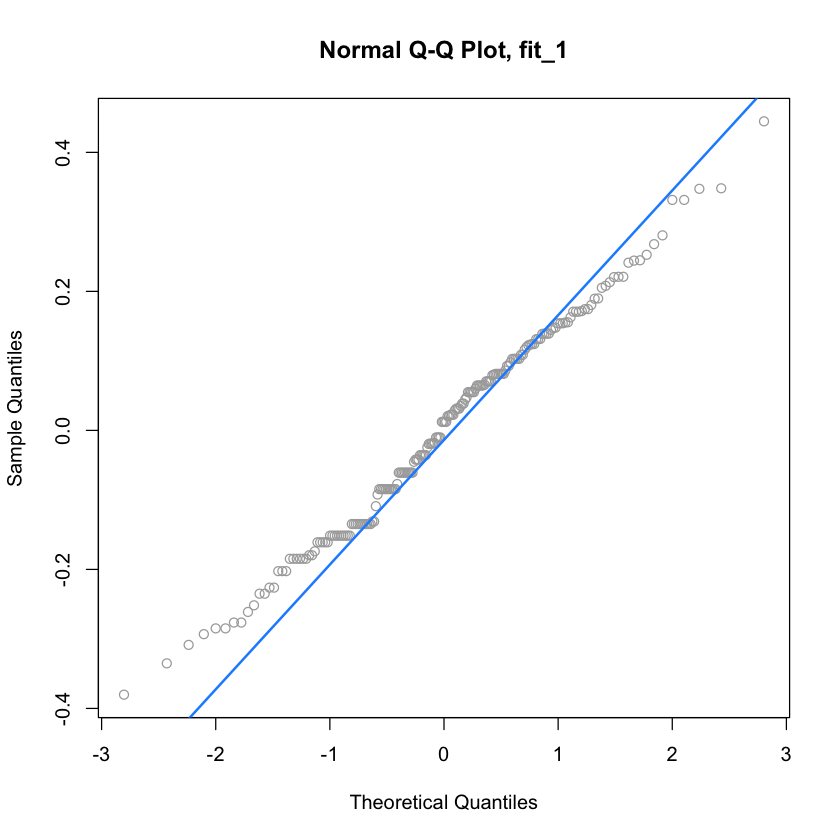

In [25]:
qqnorm(resid(md.affirms.trans.rem), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms.trans.rem), col = "dodgerblue", lwd = 2)

In [26]:
shapiro.test(resid(md.affirms.trans.rem))


	Shapiro-Wilk normality test

data:  resid(md.affirms.trans.rem)
W = 0.99121, p-value = 0.2735


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



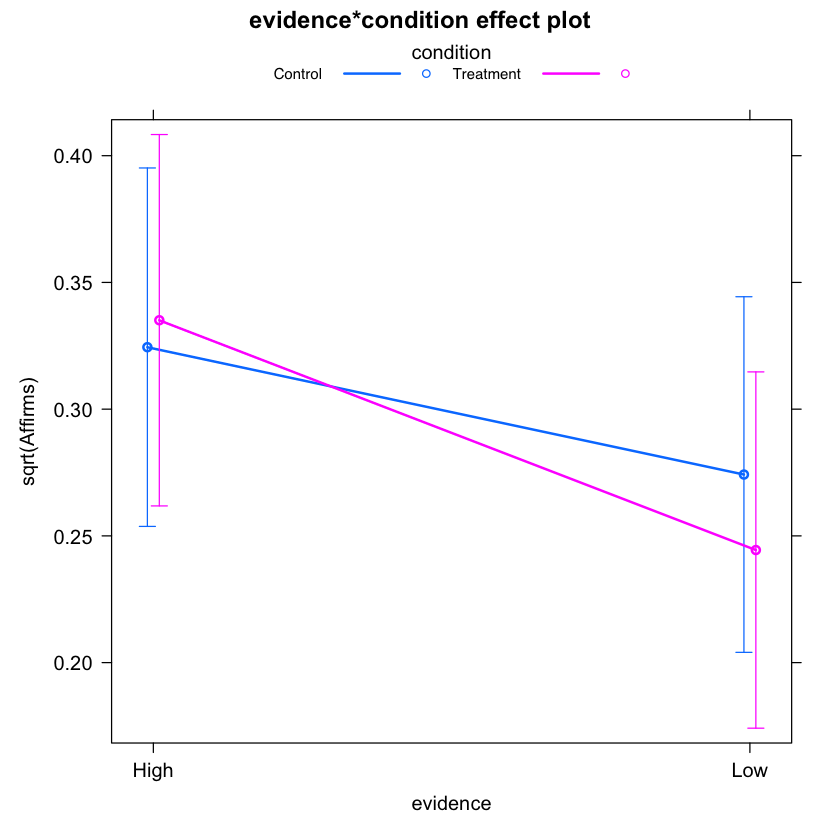

In [27]:
library(effects)
plot(allEffects(md.affirms.trans.rem), multiline=TRUE, ci.style="bars")